# Методы оптимизации и линейная регрессия


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

### Task 1

Используя функции библиотеки *sympy*, напишим функцию, на входе которой математическая функция `y=f(x)` вида `x**2 - x + 21`, а на выходе `2𝑥−1`

In [3]:
import sympy as sym

x = sym.symbols('x')

def function_1(q):
    y_1 = sym.diff(q, x)
    return y_1

f = x**2 - x + 21
function_1(f)

2*x - 1

### Task 2

Напишим функцию на входе которой математическая функция `p=f(x,y)`, двух переменных вида `(x-y)**2`, а также переменная, по которой нужно посчитать частную производную \
На выходе функции частная производная по выбранной переменной

In [4]:
import sympy as sym

x , y = sym.symbols('x y')

def function_2(q, a):
    deriv_2 = sym.diff(q, a)
    return deriv_2

f = (x-y)**2
function_2 (f, x)

2*x - 2*y

In [5]:
function_2(f, y)

-2*x + 2*y

### Task 3

У нас есть истинное значений `y_true` и предсказанное значение `y_pred`, описанное линейнным уравнением вида `y_pred = w*x + b` \
Необходимо вывести формулу квадратного отклонения между истинным и предсказанным значениями и частные производные этой формулы по переменным `w` и `b`

In [6]:
x, y , w, b = sym.symbols('x, y, w, b')
y_predy = w*x + b
y_true = y
MSE = (y_true - y_predy)**2
print ('Формулу квадратного отклонения между истинным и предсказанным значениями:')
MSE

Формулу квадратного отклонения между истинным и предсказанным значениями:


(-b - w*x + y)**2

In [7]:
print ('Частная производная квадратного отклонения по переменной w:')
function_2 (MSE, w)

Частная производная квадратного отклонения по переменной w:


-2*x*(-b - w*x + y)

In [8]:
print ('Частная производная квадратного отклонения по переменной b:')
function_2 (MSE, b)

Частная производная квадратного отклонения по переменной b:


2*b + 2*w*x - 2*y

### Task 4

Реализация алгоритма градиентного спуска
Пишем класс **Gradient()**, который будет состоять из нескольких методов. При инициализации класс получает два вектора `X`, `Y` \
Методы внутри класса:
- **predict** - на входе - `w`, `b`; на выходе - прогнозные значения `Y_pred`;
- **mse** - на входе - `Y_pred`; на выходе - среднеквадратичная ошибка *MSE*;
- **update** - на входе - `w`, `b` и `a` (learning rate); на 
выходe - новые значения `w`, `b`, которые обновились благодаря посчитанным градиентам

Для проверки работы методов, подаём на вход класса два вектора `X`, `Y` и начальные параметры `w`, `b` в методы

In [9]:
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
Y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)

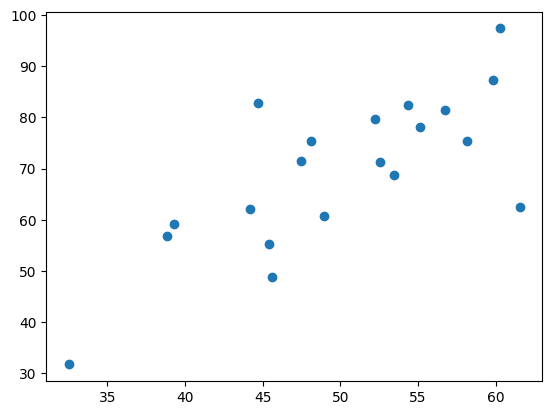

In [10]:
plt.scatter(X, Y);

In [11]:
class Gradient:
    def __init__(self, X, Y):
        self.x = X
        self.y = Y
        
    def predict(self, w, b):
        self.w, self.b = w, b
        self.Y_pred = w * self.x + b
        return self.Y_pred
    
    def mse(self, Y_pred):
        self.Y_pred = Y_pred
        self.mse = np.mean((self.y - self.Y_pred)**2)
        return self.mse

    def update(self, w, b, a):
        self.w = w - a * -2 * (self.x * (self.y - self.Y_pred)).sum() / len(X) # new_w=w-a*MSE'(w);  MSE'(w)=−2𝑥(𝑦-y_pred)
        self.b = b - a * -2 * (self.y - self.Y_pred).sum() / len(Y) # new_b=b-a*MSE'(b);  MSE'(b)=-2(y-y_pred)
        return self.w, self.b
    
# Проверяем работу методов
gr = Gradient(X, Y)
w = 0.5
b = 4
a = 0.0001
Y_pred = gr.predict(w, b)
MSE = gr.mse(Y_pred)
new_w, new_b = gr.update(w, b, a)

print('Прогнозные значения Y_pred:', Y_pred, 'MSE:', MSE, 'Новые значения переменных w и b:', new_w, new_b, sep = '\n')

Прогнозные значения Y_pred:
[20.25117263 30.71340201 34.76517902 27.73781982 33.90660393 31.57109421
 30.10589834 23.64978334 28.05252085 30.27500722 26.70986507 31.17581744
 26.08202475 33.08423536 32.36360403 28.47794428 26.34359811 34.14866342
 26.80932188 23.40840877]
MSE:
1784.8517253411974
Новые значения переменных w и b:
0.9150528224014478
4.00809052559105


### Task 5

Оптимизируем код с помощью метода **optimize**. На входе метода - `num_iterations`,
`stopping_threshold`=0.001, `a`=0.000001; на выходе - финальные значения `w`, `b`, и `mse` \
Метод повторяется, обновляя значения `w`, `b` для оптимизации  \
Критерии останова если:

- количество итераций `num_iterations` привышено;
- разницу между текущей ошибкой и ошибкой прошлой итерации меньшее `stopping_threshold`

In [15]:
# stopping_threshold=0.001 num_iterations = 100 a = 0.0001

class GradientDescent(Gradient):
    
    def __init__(self, X, Y):
        super().__init__(X,Y)
        self.x = X
        self.y = Y
        
    def optimize(self, num_iterations, stopping_threshold = 0.001, a = 0.0001):
        mse_k = self.mse(self.predict(self.w, self.b))
        for i in range(num_iterations): # останов по кол-ву оп-ций
            self.w, self.b = self.update(self.w, self.b, a) # текущ значение w и b
            mse_n = super().mse(self.predict(self.w, self.b)) # текущ значение mse
            if abs (mse_n - mse_k) < stopping_threshold: # останов, если ошибка меньше заданного
                break
            mse_k = mse_n
        return (self.w, self.b, self.mse)

gr_des = GradientDescent(X, Y)
w = 0.5
b = 4
gr_des.predict(w, b)
f_w, f_b, f_MSE = gr_des.optimize(200)
print('Финальные значения w, b:', f_w, f_b, 'Финальное значение MSE:', f_MSE, sep = '\n')

Финальные значения w, b:
1.3115991091004235
4.015587792053563
Финальное значение MSE:
99.29751520268579
